We begin by importing the needed libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import spdiags, kron, eye, linalg


(a) The following function generates a sparce matrix, representing $A \in \mathbb{R}^{(n-1)^2\times (n-1)^2}$

In [2]:
def A_matrix(n):
    ones = np.ones(n-1);
    # NOTE: This is sqrt(n) since this is the value for which the 
    # result matches the expected solution. Even though I would have
    # theoretically expect n^2. (See the plot below)
    L = np.sqrt(n) * spdiags([-ones, 2*ones, ones], [-1,0,1])
    I = eye(n-1)
    return kron(I,L) + kron(L,I)

(b) The following function implements the Jacobi iteration algorothm as described in the exercise

In [3]:
def jacobi_iteration(A, u0, b, eps):
    Dinv = np.diag(1/A.diagonal())
    alpha = Dinv.dot(b - A.dot(u0))
    uk = u0 + alpha
    while np.sqrt(alpha.dot(alpha)) > eps:
        alpha = Dinv.dot(b - A.dot(uk))
        uk = uk + alpha
    return uk

(c) The following function approximates the solution of the Poisson equation on $\Omega = (0,1)^2$ with 
$$ f(x,y) = 5 \pi^2 \sin(2\pi x)\sin(\pi y). $$
Using the functions `A_matrix` and `jabobi_iteration` defined above.

In [4]:
def problem_1_solve(n):
    print(f"Debug: Solving problem 1 for n={n}")
    A = A_matrix(n)
    u0 = np.zeros((n-1)*(n-1))

    x = y = np.linspace(0,1,n+1)[1:-1]
    X, Y = np.meshgrid(x,y)

    f = 5 * np.pi**2 * np.sin(2*np.pi*X)*np.sin(np.pi*Y)
    b = f.flatten()

    return linalg.spsolve(A,b), (X,Y)
    u = jacobi_iteration(A, u0, b, 1e-10)
    return u, (X,Y)

Using the function `problem_1_solve` we solve the discretized problem for $n \in {8,16,32,64,128}$

In [5]:
ns = np.array([8,16,32,64,128])
us = [ problem_1_solve(n) for n in ns ]

Debug: Solving problem 1 for n=8
Debug: Solving problem 1 for n=16
Debug: Solving problem 1 for n=32
Debug: Solving problem 1 for n=64
Debug: Solving problem 1 for n=128


The following function makes a 3D plots of the solution provided by `probem_1_solve` 

In [6]:
def problem_1_plot(u, XY):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    
    ax.plot_surface(XY[0],XY[1],u.reshape(XY[0].shape))
    return fig

Using the function `problem_1_plot` we plot the solution for $n = 128$

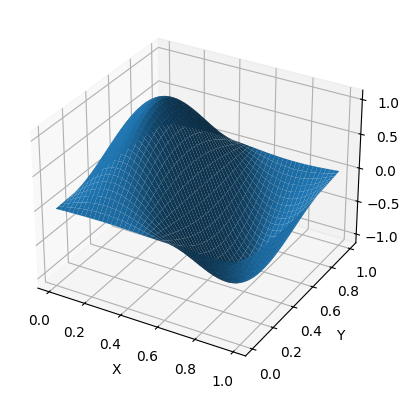

In [7]:
problem_1_plot(*us[-1]);

(d) The following function computes the $l_\infty$-norm error of the aproximate solution, using the exect solution $u(x,y) = \sin(2\pi x)\sin(\pi y)$.  

In [8]:
def problem_1_absolute_error(n, u_approx, XY):
    X, Y = XY
    u = np.sin(2*np.pi*X)*np.sin(np.pi*Y)
    return np.max(np.abs(u_approx - u.flatten()))

Using the function `problem_1_absolute_error` we compute the errors of our approximate solutions

In [9]:
errors = [ problem_1_absolute_error(n, *u) for n, u in zip(ns,us) ]
errors

[3.253519274241177,
 2.040181393708342,
 1.1787344241092264,
 0.5435024778229479,
 0.09441717975905517]

To determine the rate of convergence we plot the log of the errors agenst log $h$

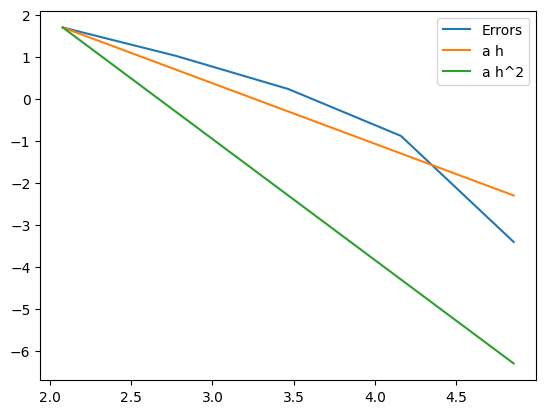

In [23]:
plt.plot(np.log(ns), np.log2(errors), label="Errors")
plt.plot(np.log(ns), np.log2(errors[0]*(ns[0]/ns)), label="a h")
plt.plot(np.log(ns), np.log2(errors[0]*(ns[0]/ns)**2), label="a h^2")
plt.legend()

Based on the plot of errors, it appears that the error converges faster then polynomial. However if we assume polynomial convergence, then 